In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 26_01_2022 07_33_07.xlsx')

In [5]:
filtrado = dados[['escolaridade','RacaCor','Classificacao final','Evolucao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado['escolaridade'] = filtrado['escolaridade'].map({'Ignorado':'Ignorado/Sem informação','Não informado':'Ignorado/Sem informação','Fund 1º ciclo (1ª a 5ª série)':'Fund 1 (1ª a 5ª série)',
                                                        'Fund 2º   ciclo (6ª a9ª série)':'Fund 2 (6ª a 9ª série)','Médio (1º ao 3º ano)':'Médio (1° ao 3° ano)',
                                                        'Sem escolaridade/Analfabeto':'Sem escolaridade/Analfabeto','Superior':'Superior'})
filtrado

,escolaridade,RacaCor,Classificacao final,Evolucao
0,NaN,NaN,COVID-19,Óbito
1,Sem escolaridade/Analfabeto,Branca,COVID-19,Cura
2,Médio (1° ao 3° ano),Branca,COVID-19,Cura
3,NaN,Ignorada,COVID-19,Óbito
4,NaN,Branca,COVID-19,Cura
...,...,...,...,...
164939,Médio (1° ao 3° ano),Branca,COVID-19,Cura
164940,Fund 1 (1ª a 5ª série),Preta,COVID-19,Cura
164941,Fund 1 (1ª a 5ª série),Parda,COVID-19,Cura
164942,NaN,Branca,COVID-19,Óbito


In [6]:
numerador = filtrado.loc[filtrado['Evolucao']=='Óbito']
numerador = numerador.groupby('escolaridade').count()
numerador

,RacaCor,Classificacao final,Evolucao
escolaridade,,,
Fund 1 (1ª a 5ª série),5270,5275,5275
Fund 2 (6ª a 9ª série),4058,4061,4061
Ignorado/Sem informação,7110,7124,7124
Médio (1° ao 3° ano),3215,3216,3216
Sem escolaridade/Analfabeto,689,689,689
Superior,1213,1213,1213


In [7]:
denominador = filtrado
denominador['Evolucao'] = denominador['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominador = denominador.loc[denominador['Evolucao']=='Óbito/Cura']
denominador = denominador.groupby('escolaridade').count()
denominador

,RacaCor,Classificacao final,Evolucao
escolaridade,,,
Fund 1 (1ª a 5ª série),13970,13986,13986
Fund 2 (6ª a 9ª série),12552,12562,12562
Ignorado/Sem informação,18579,18613,18613
Médio (1° ao 3° ano),14024,14045,14045
Sem escolaridade/Analfabeto,1514,1516,1516
Superior,6017,6026,6026


In [8]:
calculo = numerador['Evolucao']/denominador['Evolucao']*100
calculo = calculo.to_frame()
calculo = calculo.reset_index()
calculo

,escolaridade,Evolucao
0,Fund 1 (1ª a 5ª série),37.716288
1,Fund 2 (6ª a 9ª série),32.327655
2,Ignorado/Sem informação,38.274324
3,Médio (1° ao 3° ano),22.897828
4,Sem escolaridade/Analfabeto,45.448549
5,Superior,20.129439


In [9]:
ordena = calculo.copy()
ordena.loc[0] = calculo.loc[2]
ordena.loc[1] = calculo.loc[5]
ordena.loc[2] = calculo.loc[3]
ordena.loc[3] = calculo.loc[1]
ordena.loc[4] = calculo.loc[0]
ordena.loc[5] = calculo.loc[4]
ordena['Evolucao'] = round(ordena['Evolucao'],0)
ordena['Evolucao'] = ordena['Evolucao'].astype(int)
ordena['escolaridade'] = ordena['escolaridade'].map({'Ignorado/Sem informação':'Ignorado/sem informação','Superior':'Superior','Médio (1° ao 3° ano)':'Médio (1° ao 3° ano)',
                                                                   'Fund 2 (6ª a 9ª série)':'Fund 2 (6ª a 9ª série)','Fund 1 (1ª a 5ª série)':'Fund 1 (1ª a 5ª série)',
                                                                   'Sem escolaridade/Analfabeto':'Sem escolaridade/analfabeto'})
ordena

,escolaridade,Evolucao
0,Ignorado/sem informação,38
1,Superior,20
2,Médio (1° ao 3° ano),23
3,Fund 2 (6ª a 9ª série),32
4,Fund 1 (1ª a 5ª série),38
5,Sem escolaridade/analfabeto,45


In [10]:
escolaridade = ordena['escolaridade']

In [11]:
eixo_y = ordena['Evolucao']

In [12]:
legenda = pd.DataFrame(columns={'Letalidade hospitalar (% dos casos com evolucação que foram a óbito)'})

In [13]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

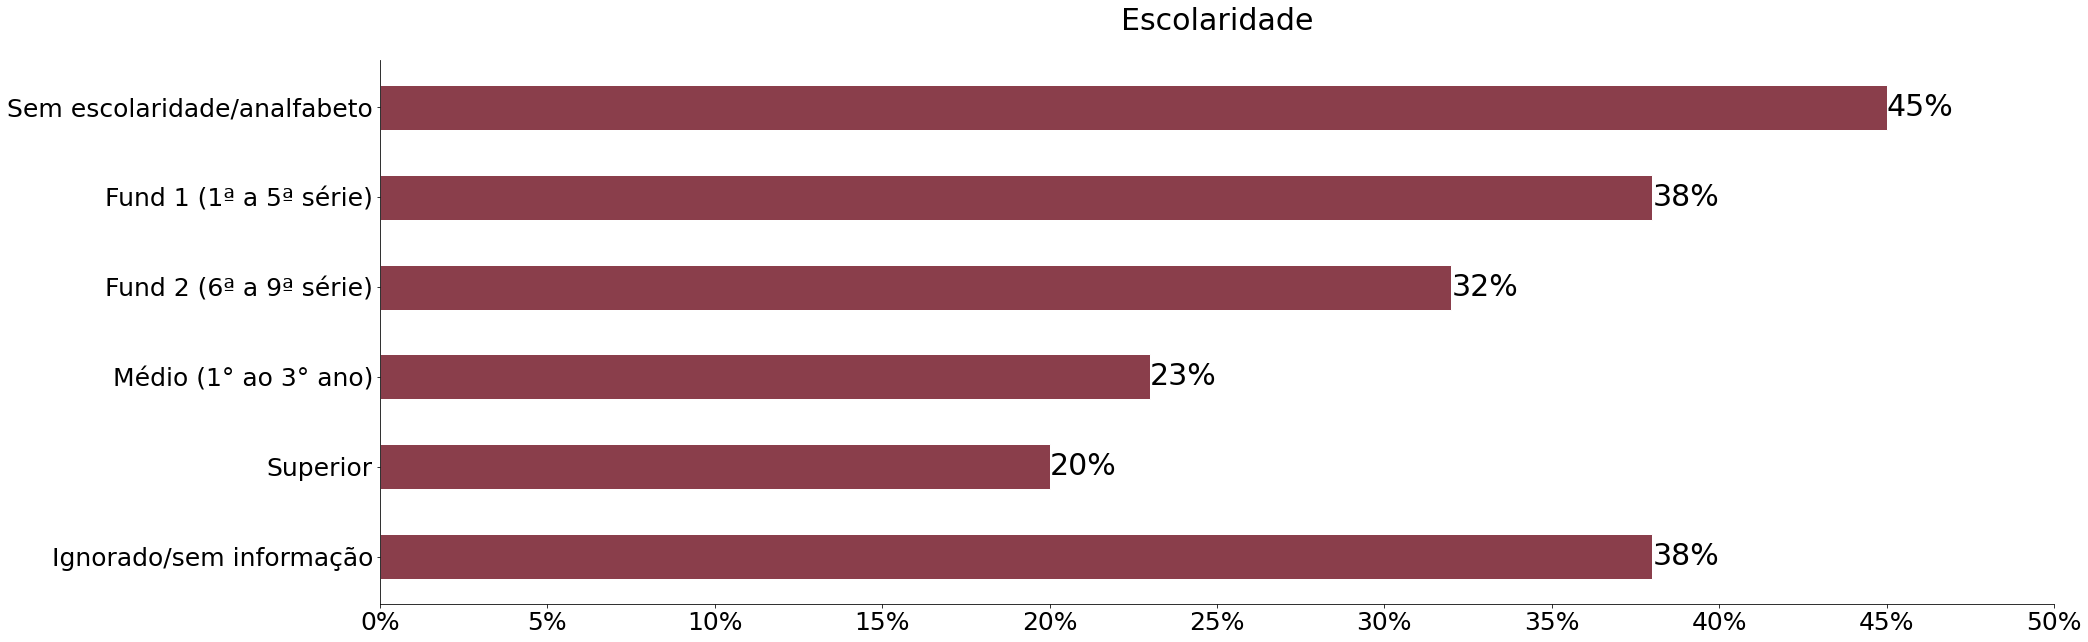

In [14]:
plt.figure(figsize=(30,10))
width=0.5
plt.barh(escolaridade,eixo_y,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.title('Escolaridade',fontsize=30,pad=30)
plt.xticks(np.arange(0,55,5),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
for index, value in enumerate(ordena['Evolucao']): 
    plt.text(value, index, 
             str(value)+'%', va='center',fontsize=30) 
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide12_Escolaridade.png',dpi=720,bbox_inches='tight')

In [15]:
filtrado = dados[['escolaridade','RacaCor','Classificacao final','Evolucao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado['escolaridade'] = filtrado['escolaridade'].map({'Ignorado':'Ignorado/Sem informação','Não informado':'Ignorado/Sem informação','Fund 1º ciclo (1ª a 5ª série)':'Fund 1 (1ª a 5ª série)',
                                                        'Fund 2º   ciclo (6ª a9ª série)':'Fund 2 (6ª a 9ª série)','Médio (1º ao 3º ano)':'Médio (1° ao 3° ano)',
                                                        'Sem escolaridade/Analfabeto':'Sem escolaridade/Analfabeto','Superior':'Superior'})
filtrado

,escolaridade,RacaCor,Classificacao final,Evolucao
0,NaN,NaN,COVID-19,Óbito
1,Sem escolaridade/Analfabeto,Branca,COVID-19,Cura
2,Médio (1° ao 3° ano),Branca,COVID-19,Cura
3,NaN,Ignorada,COVID-19,Óbito
4,NaN,Branca,COVID-19,Cura
...,...,...,...,...
164939,Médio (1° ao 3° ano),Branca,COVID-19,Cura
164940,Fund 1 (1ª a 5ª série),Preta,COVID-19,Cura
164941,Fund 1 (1ª a 5ª série),Parda,COVID-19,Cura
164942,NaN,Branca,COVID-19,Óbito


In [16]:
numeradorRaca = filtrado.loc[filtrado['Evolucao']=='Óbito']
numeradorRaca = numeradorRaca.groupby('RacaCor').count()
numeradorRaca

,escolaridade,Classificacao final,Evolucao
RacaCor,,,
Amarela,56,104,104
Branca,17985,31294,31294
Ignorada,1422,2883,2883
Indígena,38,63,63
Parda,988,1593,1593
Preta,1066,1782,1782


In [17]:
denominadorRaca = filtrado
denominadorRaca['Evolucao'] = denominadorRaca['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominadorRaca = denominadorRaca.loc[denominadorRaca['Evolucao']=='Óbito/Cura']
denominadorRaca = denominadorRaca.groupby('RacaCor').count()
denominadorRaca

,escolaridade,Classificacao final,Evolucao
RacaCor,,,
Amarela,151,285,285
Branca,57147,95900,95900
Ignorada,3584,7553,7553
Indígena,167,237,237
Parda,2763,4408,4408
Preta,2844,4550,4550


In [18]:
calculoRaca = numeradorRaca['Evolucao']/denominadorRaca['Evolucao']*100
calculoRaca = calculoRaca.to_frame()
calculoRaca = calculoRaca.reset_index()
calculoRaca['RacaCor'] = calculoRaca['RacaCor'].map({'Amarela':'Amarela','Branca':'Branca','Ignorada':'Ignorado/Sem informação','Indígena':'Indígena','Parda':'Parda','Preta':'Preta'})
calculoRaca

,RacaCor,Evolucao
0,Amarela,36.491228
1,Branca,32.631908
2,Ignorado/Sem informação,38.170263
3,Indígena,26.582278
4,Parda,36.138838
5,Preta,39.164835


In [19]:
ordenaRaca = calculoRaca.copy()
ordenaRaca.loc[0] = calculoRaca.loc[2]
ordenaRaca.loc[1] = calculoRaca.loc[3]
ordenaRaca.loc[2] = calculoRaca.loc[1]
ordenaRaca.loc[3] = calculoRaca.loc[0]
ordenaRaca.loc[4] = calculoRaca.loc[4]
ordenaRaca.loc[5] = calculoRaca.loc[5]
ordenaRaca['Evolucao'] = round(ordenaRaca['Evolucao'],0)
ordenaRaca['Evolucao'] = ordenaRaca['Evolucao'].astype(int)
ordenaRaca['RacaCor'] = ordenaRaca['RacaCor'].map({'Ignorado/Sem informação':'Ignorado/sem informação','Indígena':'Indígena','Branca':'Branca','Amarela':'Amarela',
                                                                 'Parda':'Parda','Preta':'Preta'})
ordenaRaca

,RacaCor,Evolucao
0,Ignorado/sem informação,38
1,Indígena,27
2,Branca,33
3,Amarela,36
4,Parda,36
5,Preta,39


In [20]:
raca = ordenaRaca['RacaCor']

In [21]:
eixo_y_RacaCor = ordenaRaca['Evolucao']

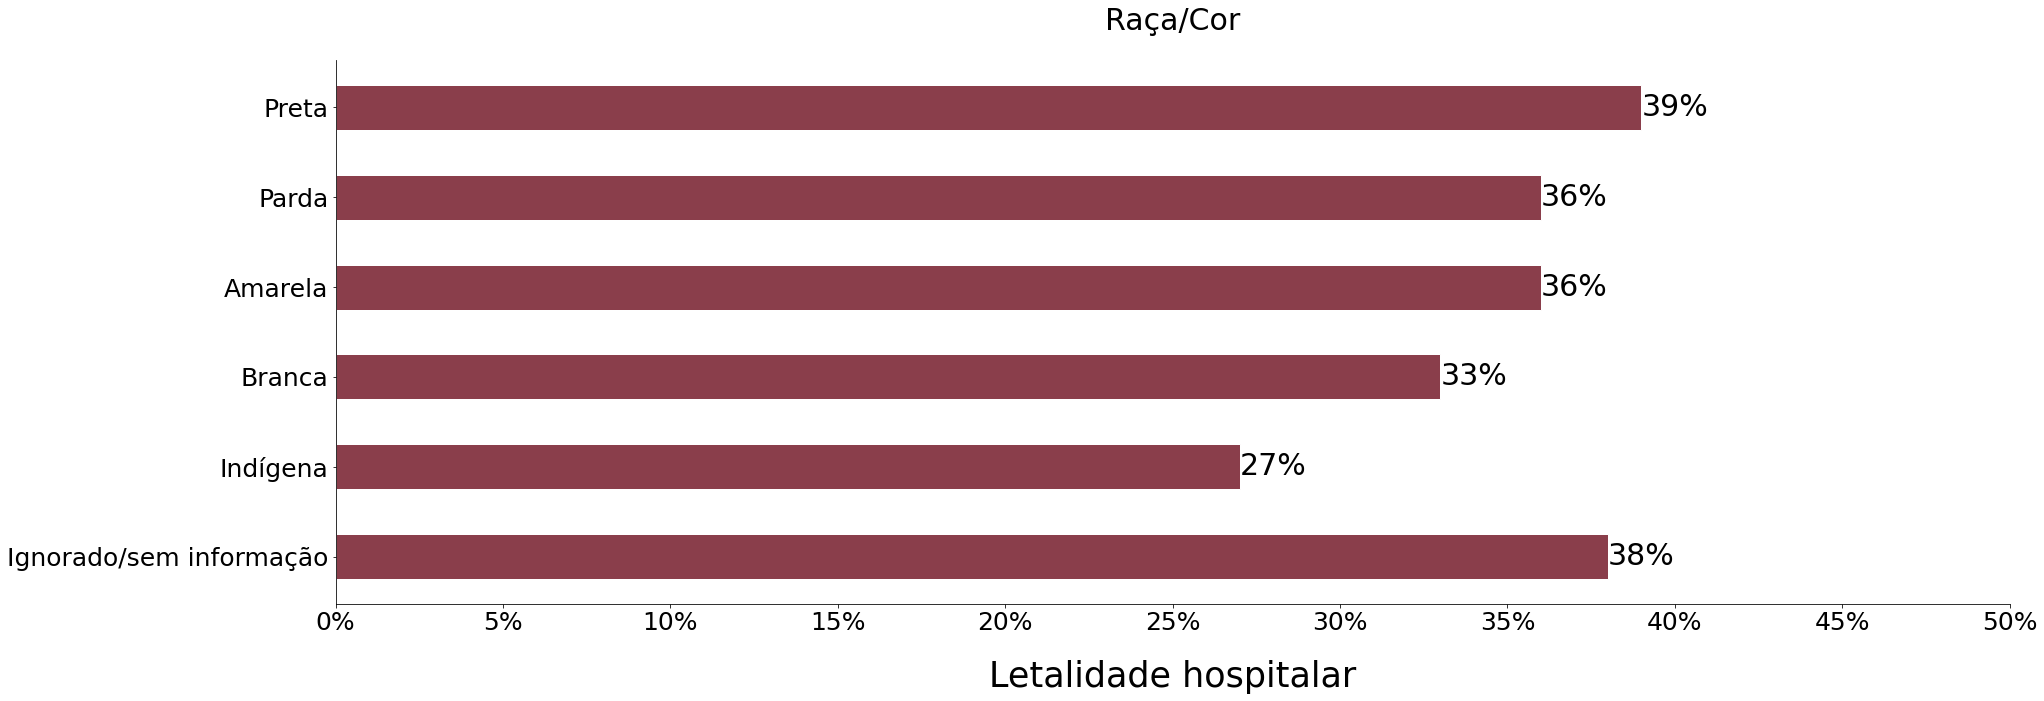

In [22]:
plt.figure(figsize=(30,10))
width=0.5
plt.barh(raca,eixo_y_RacaCor,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.title('Raça/Cor',fontsize=30,pad=30)
plt.xlabel(r'Letalidade hospitalar',fontsize=35,labelpad=25)
plt.xticks(np.arange(0,55,5),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
for index, value in enumerate(ordenaRaca['Evolucao']): 
    plt.text(value, index, 
             str(value)+'%', va='center',fontsize=30) 
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide12_RacaCor.png',dpi=720,bbox_inches='tight')